# Deviation


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Diverging Bar


In [2]:
mtcars = pd.read_csv("data/mtcars.csv")
mtcars.head()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout


In [3]:
x = mtcars["mpg"]
mtcars["mpg_z"] = (x - x.mean()) / x.std()
mtcars["colors"] = np.where(mtcars["mpg_z"] < 0, "red", "green")
mtcars.sort_values("mpg_z", inplace=True)
mtcars.reset_index(inplace=True)
mtcars.head()


,index,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,mpg_z,colors
0,15,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,-1.829979,red
1,14,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,-1.829979,red
2,23,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,-1.191664,red
3,6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,-0.988049,red
4,16,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,-0.908604,red


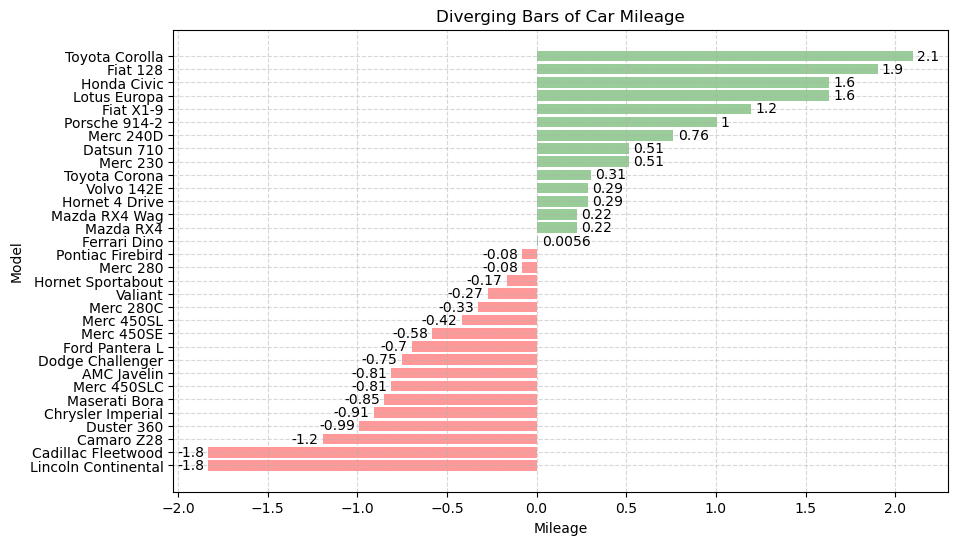

In [4]:
_, ax = plt.subplots(figsize=(10, 6))

bar = ax.barh(y=mtcars.index, width=mtcars.mpg_z, color=mtcars.colors, alpha=0.4, lw=5)

ax.bar_label(container=bar, fmt="%0.2g", label_type="edge", padding=3)

ax.set(
    xlabel="Mileage",
    ylabel="Model",
    yticks=mtcars.index,
    yticklabels=mtcars.cars,
    title="Diverging Bars of Car Mileage",
)
ax.tick_params(axis="both", labelsize="medium")
ax.grid(linestyle="--", alpha=0.5)
plt.show()


## Diverging Lollipop


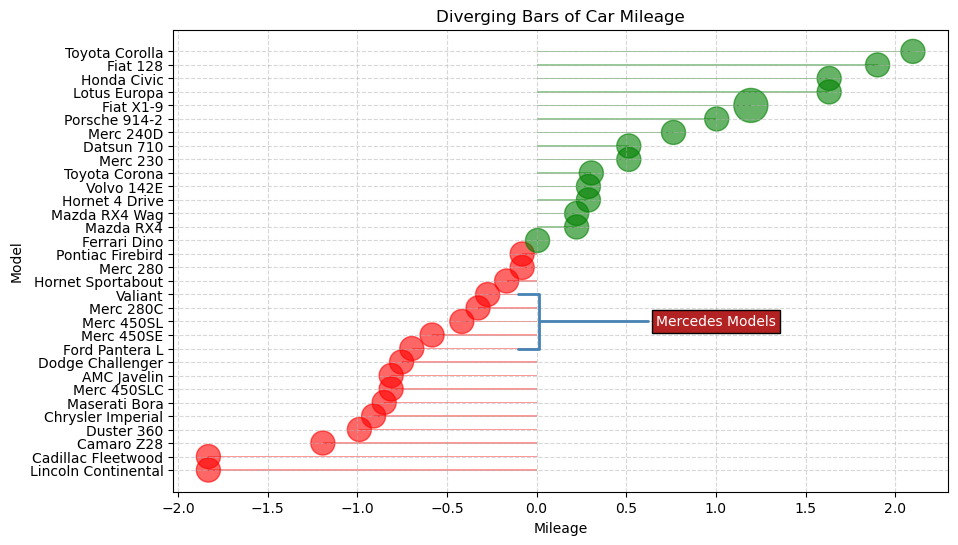

In [5]:
_, ax = plt.subplots(figsize=(10, 6))

ax.scatter(
    mtcars.mpg_z,
    mtcars.index,
    color=mtcars.colors,
    s=[600 if x == "Fiat X1-9" else 300 for x in mtcars.cars],
    alpha=0.6,
)

ax.barh(y=mtcars.index, width=mtcars.mpg_z, color=mtcars.colors, alpha=0.4, height=0.1)

ax.annotate(
    "Mercedes Models",
    xy=(0.0, 11.0),
    xytext=(1.0, 11),
    xycoords="data",
    fontsize='medium',
    ha="center",
    va="center",
    color="white",
    bbox=dict(boxstyle="square", fc="firebrick"),
    arrowprops=dict(
        arrowstyle="-[, widthB=2.0, lengthB=1.5", lw=2.0, color="steelblue"
    ),
)

ax.set(
    xlabel="Mileage",
    ylabel="Model",
    yticks=mtcars.index,
    yticklabels=mtcars.cars,
    title="Diverging Bars of Car Mileage",
)
ax.tick_params(axis="both", labelsize="medium")

ax.grid(linestyle="--", alpha=0.5)
plt.show()


## Diverging Dot


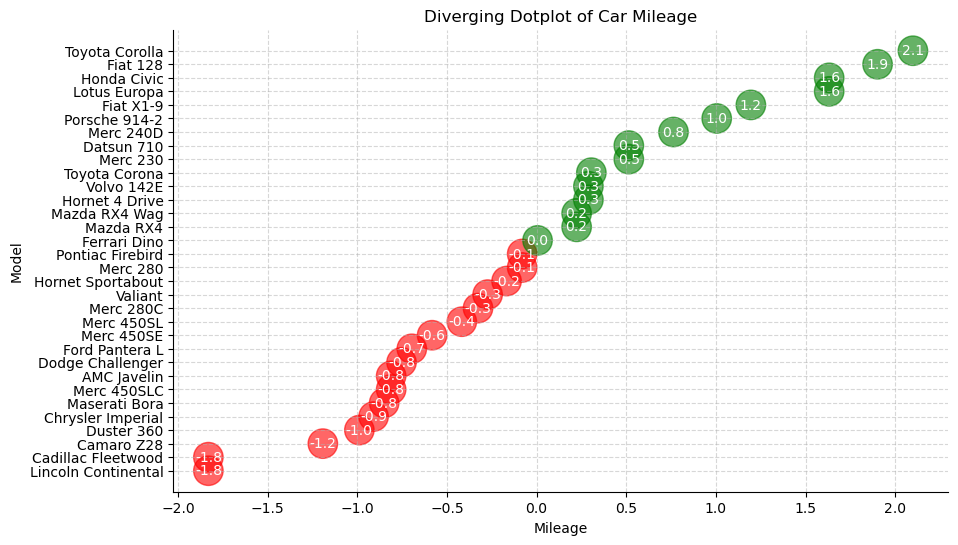

In [6]:
_, ax = plt.subplots(figsize=(10, 6))

scat = ax.scatter(mtcars.mpg_z, mtcars.index, s=450, alpha=0.6, color=mtcars.colors)

for x, y, text in zip(mtcars.mpg_z, mtcars.index, mtcars.mpg_z):
    ax.text(
        x,
        y,
        round(text, 1),
        horizontalalignment="center",
        verticalalignment="center",
        fontdict={"color": "white"},
    )

ax.spines[["top", "right"]].set_visible(False)

ax.set(
    xlabel="Mileage",
    ylabel="Model",
    yticks=mtcars.index,
    yticklabels=mtcars.cars,
    title="Diverging Dotplot of Car Mileage",
)
ax.tick_params(axis="both", labelsize="medium")

ax.grid(linestyle="--", alpha=0.5)
plt.show()
